In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd

In [2]:
# some code that allows you to hide warnings
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

The data gives us Information about countries number of internet users , population , percentage of Internet users and their ranks according to internet users and percentage of internet users

In [3]:
# Reading csv file with data
users = pd.read_csv('Data/List of Countries by number of Internet Users - Sheet1.csv')

# Reading the file with "worldwide geometry"
df = gpd.read_file('Data/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp')
df1 = df[['SOVEREIGNT','geometry']]
df1.rename(columns={'SOVEREIGNT':'Country or Area'}, inplace=True)

users['Population'] = users['Population'].str.replace(',', '').astype(int)
users['Internet Users'] = users['Internet Users'].str.replace(',', '').astype(int)

users['percent'] = users['Internet Users'] / users['Population'] * 100

users2 = users[['Country or Area', 'percent']].copy()

# Updating the name of some countries
users2.at[2, 'Country or Area'] = 'United States of America'
users2.at[53, 'Country or Area'] = 'United Republic of Tanzania'
users2.at[156, 'Country or Area'] = 'eSwatini'

merged = df1.merge(users2, how='left', on='Country or Area')

/Users/dmytro.lavoryk/PycharmProjects/learning/venv/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(-15, -60, '59.99% population of the World has access to Internet')

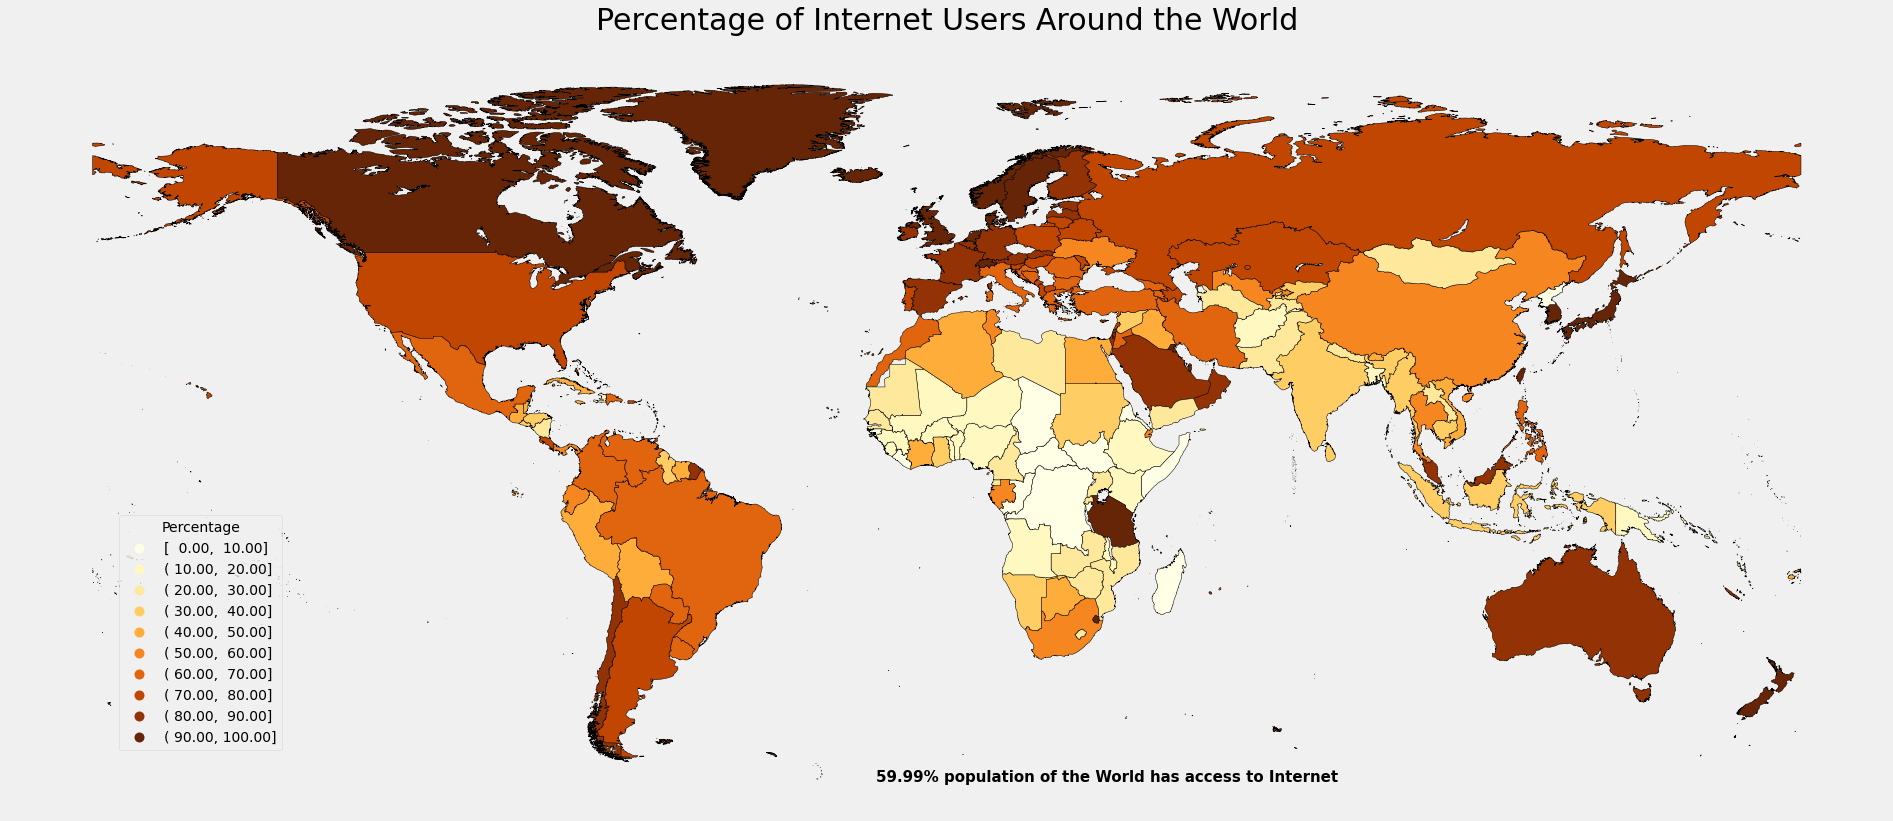

In [4]:
title = str(np.around(merged['percent'].mean(), decimals=2)) + '% population of the World has access to Internet'

cmap = 'YlOrBr'
figsize = (30, 30)

plt.style.use('fivethirtyeight')

ax = merged.dropna().plot(column='percent', cmap=cmap , figsize=figsize,
                          scheme='User_Defined',
                          classification_kwds=dict(bins=[10,20,30,40, 50, 60, 70, 80, 90, 100]),
                          edgecolor='black', legend=True)
ax.get_legend().set_bbox_to_anchor((0.15, 0.4))
ax.get_legend().set_title('Percentage')
ax.set_title("Percentage of Internet Users Around the World" , size=30, pad=20)
ax.axis('off')
ax.text(-15, -60, title, horizontalalignment='left', size=15, color='black', weight='semibold')


In [5]:
import random
def make_histogram_country_percent(data, name):
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(111)
    n = data.__len__()+1
    c = random.choices(all_colors, k=n)

    plt.figure(figsize=(16,10), dpi= 80)
    plt.bar(data['Country or Area'], data['percent'], color=c, width=.5)
    for i, val in enumerate(data['percent'].values):
        plt.text(i, val, np.around(float(val), decimals=2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    plt.gca().set_xticklabels(data['Country or Area'], rotation=60, horizontalalignment='right')
    plt.title(name, fontsize=22)
    plt.ylabel('Percent')
    plt.xlabel('Country')
    plt.ylim(0, 100)
    plt.show()

In [6]:
users2['Population'] = users['Population']
users2.sort_values('Population', ascending=True, inplace=True)
users2.head(10)

,Country or Area,percent,Population
214,Ascension,44.789082,806
213,Niue,63.906057,1618
210,Falkland Islands,99.003436,2910
209,Saint Helena,64.093516,4534
211,Montserrat,54.722812,5177
208,Tuvalu,49.320944,11192
207,Nauru,57.003257,11359
212,Wallis and Futuna,11.747218,11773
206,Anguilla,80.776712,14909
205,British Virgin Islands,46.339274,31196


/Users/dmytro.lavoryk/PycharmProjects/learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


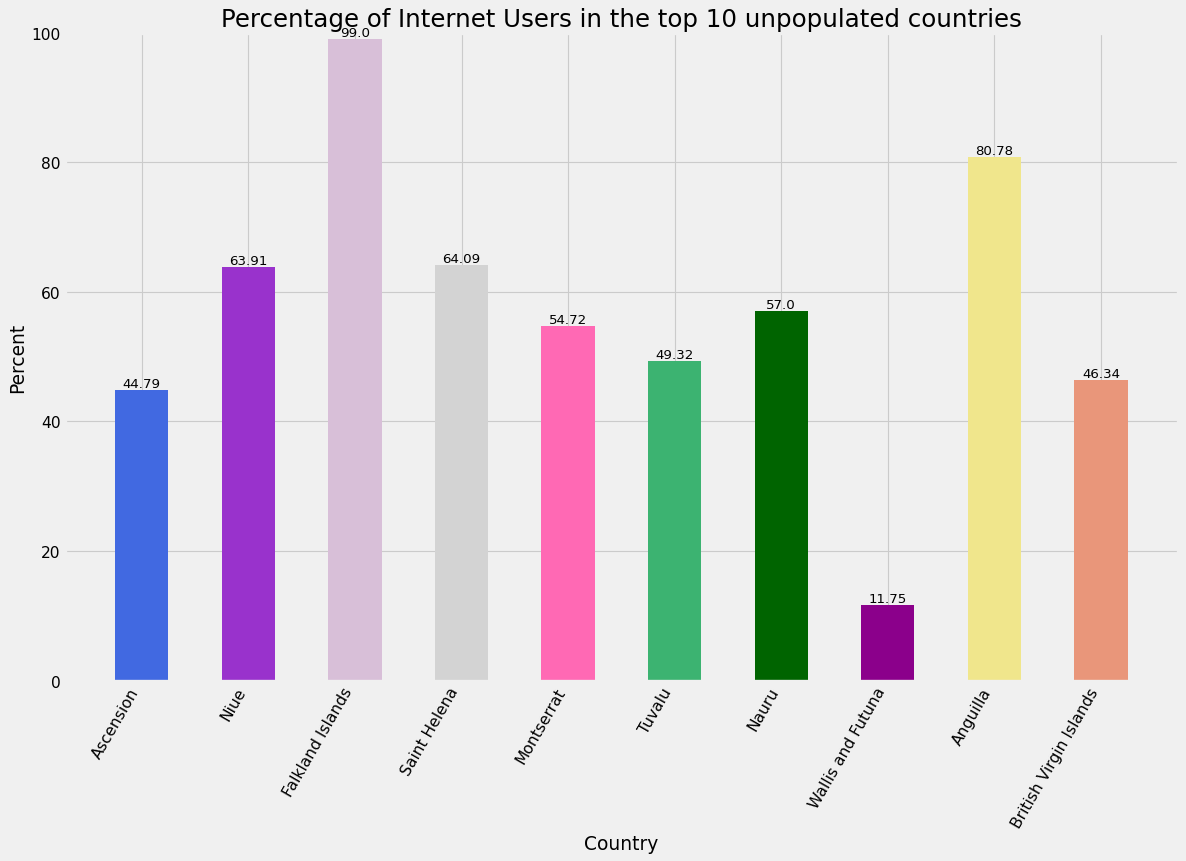

In [7]:
make_histogram_country_percent(users2.head(10), "Percentage of Internet Users in the top 10 unpopulated countries")

In [8]:
users2.sort_values('Population', ascending=False, inplace=True)
users2.head(10)

,Country or Area,percent,Population
0,China,54.300000,1409517397
1,India,34.450000,1339180127
2,United States of America,75.230000,324459463
6,Indonesia,32.290000,263991379
11,Pakistan,28.006000,220800300
3,Brazil,67.470000,209288278
24,Nigeria,16.081373,190015955
26,Bangladesh,18.540403,164669751
5,Russia,76.010000,143989754
7,Mexico,63.850000,129163276


/Users/dmytro.lavoryk/PycharmProjects/learning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


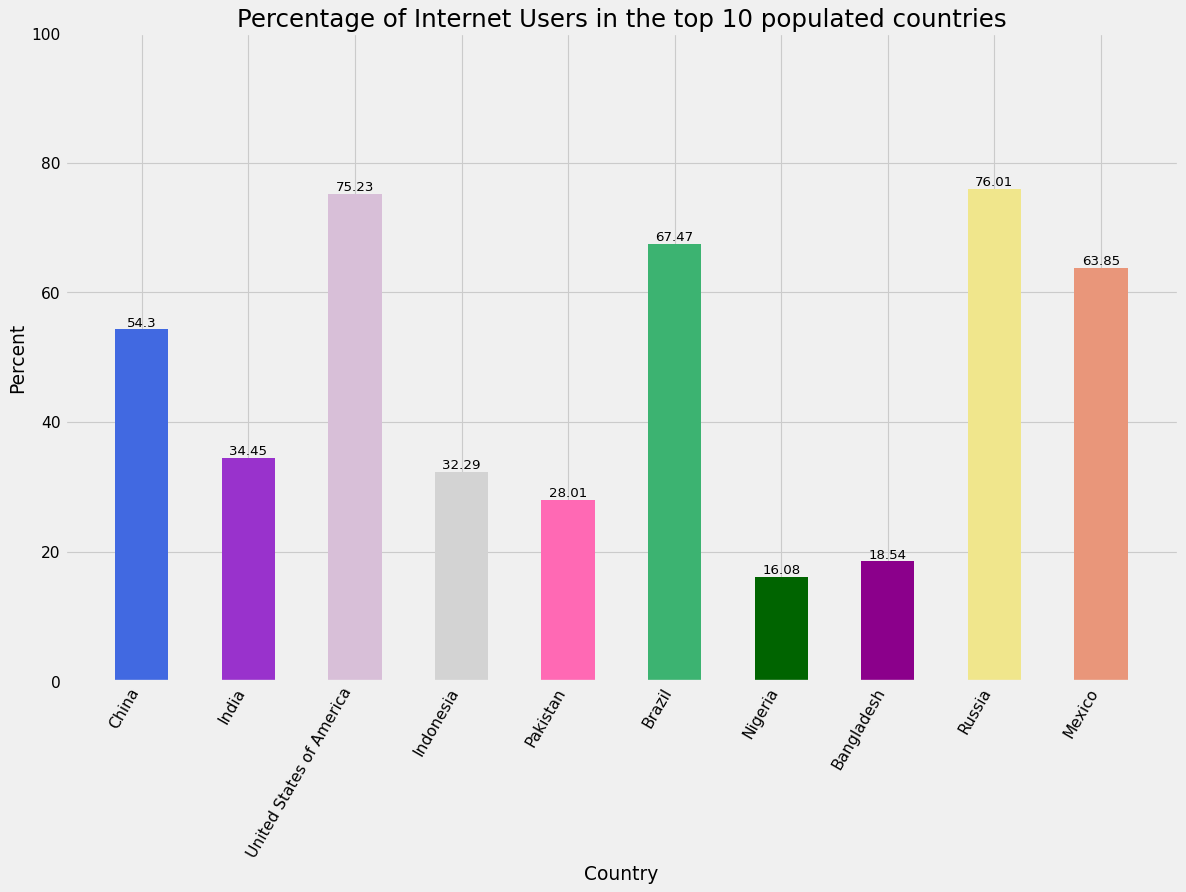

In [9]:
make_histogram_country_percent(users2.head(10), "Percentage of Internet Users in the top 10 populated countries")